# Logistic Regression: Titanic Dataset

## Logistic Regression Task :

* Use Logistic Regression on the Titanic Dataset with K- Cross Validation (K from 2 to 5, multiple cases and with penalty of ridge regression)

* Find out the change in classification accuracy of the model.


# Import libararies

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [51]:
train = pd.read_csv('titanic_train.csv')

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

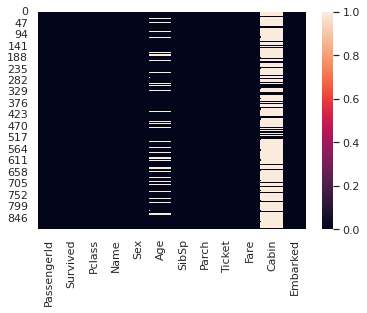

In [54]:
sns.heatmap(train.isnull())

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! 

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


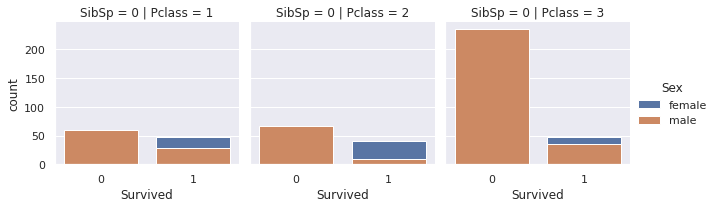

In [55]:
g = sns.FacetGrid(survival_analyze_single, col="Pclass", row="SibSp",hue='Sex')
g = g.map(sns.countplot, 'Survived').add_legend()

In [57]:
survival_analyze_family = train[train['SibSp'] != 0]

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


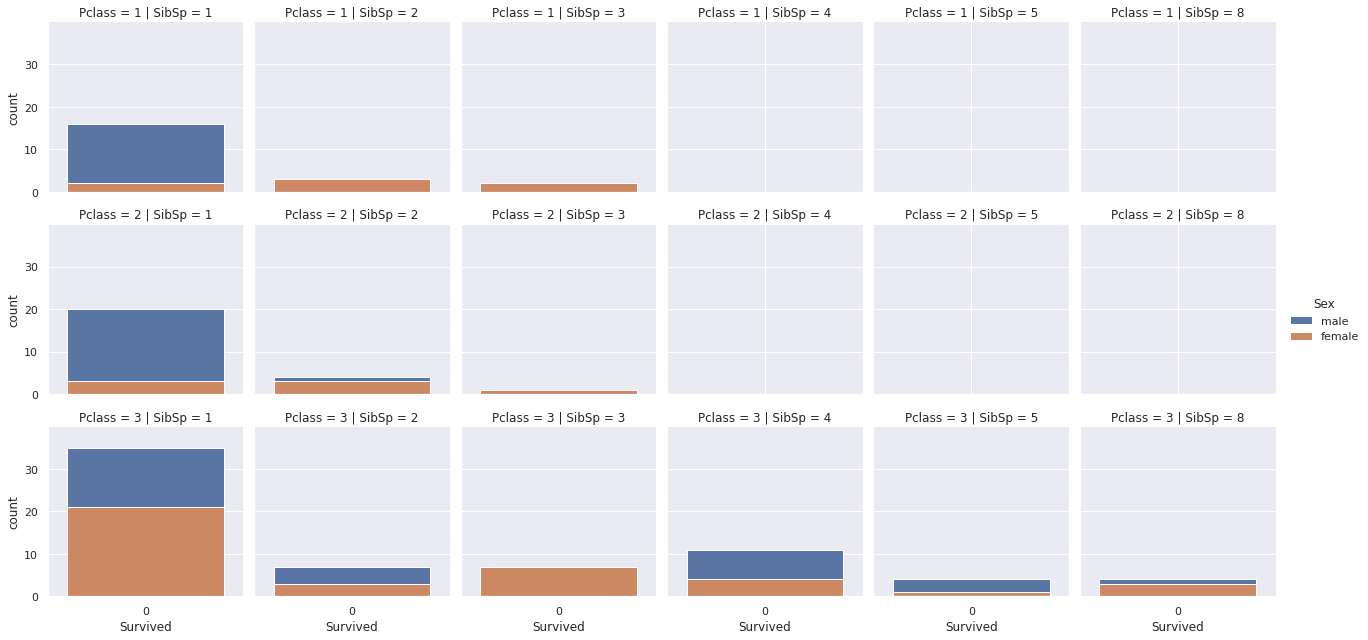

In [58]:
g = sns.FacetGrid(survival_analyze_family, row="Pclass", col="SibSp",hue='Sex')
g = g.map(sns.countplot, 'Survived').add_legend()

C:\Program Files\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


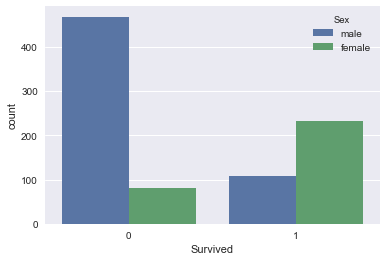

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=train)

C:\Program Files\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


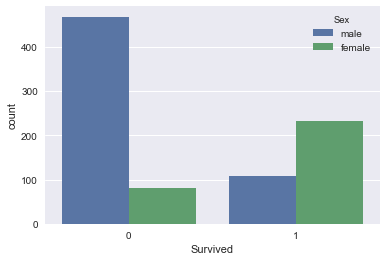

In [ ]:
sns.countplot(x=train['Survived'],hue=train['Sex'])

C:\Program Files\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


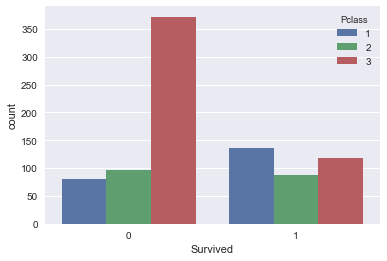

In [ ]:
sns.countplot(x='Survived',hue='Pclass',data=train)

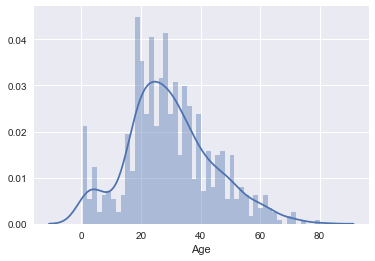

In [ ]:
sns.distplot(train['Age'].dropna(),bins=50)

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

Now apply that function!

C:\Program Files\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


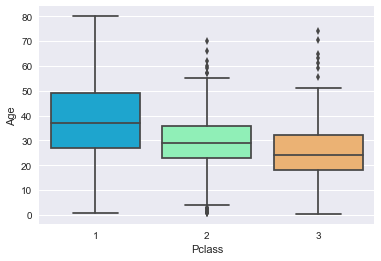

In [ ]:
sns.boxplot(x="Pclass", y="Age", data=train,palette='rainbow')

In [ ]:
train.groupby("Pclass")['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [ ]:
train.groupby("Pclass")['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [59]:
train.groupby(["Sex","Pclass"])['Age'].median()

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [60]:
train['Age'] = train['Age'].fillna(train.groupby(["Sex","Pclass"])['Age'].transform('median'))

Now let's check that heat map again!

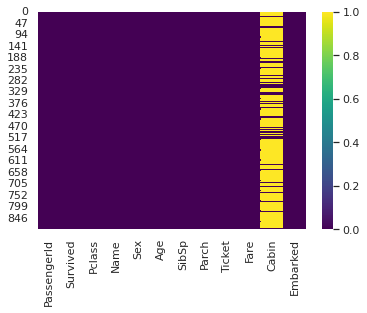

In [61]:
sns.heatmap(train.isnull(),cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [62]:
train.drop('Cabin',axis=1,inplace=True)

In [63]:
train.dropna(inplace=True)

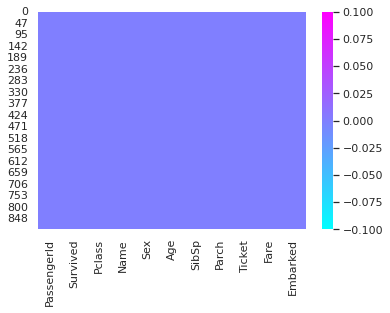

In [64]:
sns.heatmap(train.isnull(),cmap='cool')

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [66]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [67]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [68]:
embark = pd.get_dummies(train['Embarked'],drop_first=True).rename(columns=lambda x: 'Embarked_' + str(x))

In [69]:
train.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [70]:
train = pd.concat([train,sex,embark],axis=1)

In [71]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set.

## Train Test Split

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], 
                                                    test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
logmodel = LogisticRegression(C=0.001)
logmodel.fit(X_train,y_train)

LogisticRegression(C=0.001)

In [78]:
predictions = logmodel.predict(X_test)

Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [79]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.96      0.78       163
           1       0.79      0.22      0.35       104

    accuracy                           0.67       267
   macro avg       0.73      0.59      0.56       267
weighted avg       0.71      0.67      0.61       267



In [81]:
from sklearn.metrics import confusion_matrix

In [82]:
confusion_matrix(y_test,predictions)

array([[157,   6],
       [ 81,  23]])

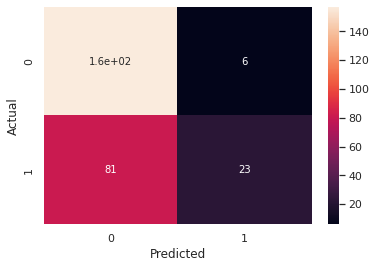

In [83]:
conf_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True)

# Model Improvements

### Convert *Pclass* variable into dummy variables

In [84]:
pclass = pd.get_dummies(train['Pclass'],drop_first=True).rename(columns=lambda x: 'Pclass_' + str(x))
pclass

,Pclass_2,Pclass_3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [85]:
# drop Pclass column
train.drop(['Pclass'],axis=1,inplace=True)
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,0,35.0,0,0,8.0500,1,0,1


In [86]:
# add Pclass dummy variables
train = pd.concat([train,pclass],axis=1)
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


### Define variables

In [87]:
features = train.drop('Survived',axis=1)
features.head()

,Age,SibSp,Parch,Fare,male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,1


In [88]:
target =  train[['Survived']]
target.head()

,Survived
0,0
1,1
2,1
3,1
4,0


# Standardise variables 

In [89]:
#standardise variables 
from sklearn.preprocessing import StandardScaler

In [90]:
scaler = StandardScaler()
features_sd = scaler.fit_transform(features)

# Split data into Train and Split

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(features_sd, target, test_size = 0.3, random_state=101)

### 2-Fold Cross Validation

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [94]:
#define model 
logmodel = LogisticRegression(penalty='l2', C=0.5)

scores = cross_val_score(logmodel, X_train, y_train.values.ravel(), cv = 2)    

#predictions
predictions = cross_val_predict(logmodel, X_test, y_test.values.ravel(), cv = 2)     #y_test is needed here in predictions to get scores for each fold of cv

print("Logistic Regression witn 2-Fold Cross Validation")   
print("\n\tScores : ", scores)
print("\n\tMean Score : ", np.mean(scores) )
print("\n\tSTD of Scores :",  np.std(scores))
print('\n', classification_report(y_test,predictions))
print('\n', confusion_matrix(y_test,predictions))

Logistic Regression witn 2-Fold Cross Validation

	Scores :  [0.78778135 0.81993569]

	Mean Score :  0.8038585209003215

	STD of Scores : 0.016077170418006437

               precision    recall  f1-score   support

           0       0.80      0.88      0.84       163
           1       0.77      0.65      0.71       104

    accuracy                           0.79       267
   macro avg       0.79      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267


 [[143  20]
 [ 36  68]]


### 3-Fold Cross Validation

In [95]:
#define variables 
features2 = train.drop('Survived',axis=1)
target2 =  train[['Survived']]

#scale data
scaler = StandardScaler()
features_sd2 = scaler.fit_transform(features2)

#split data into train and split 
X_train2, X_test2, y_train2, y_test2 = train_test_split(features_sd2, target2, test_size = 0.3, random_state=101)

#define model 
logmodel2 = LogisticRegression(penalty='l2', C=0.5)

scores2 = cross_val_score(logmodel2, X_train2, y_train2.values.ravel(), cv = 3)    

#predictions
predictions2 = cross_val_predict(logmodel2, X_test2, y_test2.values.ravel(), cv = 3)     #y_test is needed here in predictions to get scores for each fold of cv


print("Logistic Regression witn 3-Fold Cross Validation")   
print("\n\tScores : ", scores2)
print("\n\tMean Score : ", np.mean(scores2) )
print("\n\tSTD of Scores :",  np.std(scores2))
print('\n', classification_report(y_test2,predictions2))
print('\n', confusion_matrix(y_test2,predictions2))

Logistic Regression witn 3-Fold Cross Validation

	Scores :  [0.75961538 0.80193237 0.84057971]

	Mean Score :  0.8007091539700234

	STD of Scores : 0.033064862416929915

               precision    recall  f1-score   support

           0       0.81      0.88      0.84       163
           1       0.78      0.68      0.73       104

    accuracy                           0.80       267
   macro avg       0.80      0.78      0.79       267
weighted avg       0.80      0.80      0.80       267


 [[143  20]
 [ 33  71]]


### 4-Fold Cross Validation

In [96]:
#define variables 
features3 = train.drop('Survived',axis=1)
target3 =  train[['Survived']]

#scale data
scaler = StandardScaler()
features_sd3 = scaler.fit_transform(features3)

#split data into train and split 
X_train3, X_test3, y_train3, y_test3 = train_test_split(features_sd3, target3, test_size = 0.3, random_state=101)

#define model 
logmodel3 = LogisticRegression(penalty='l2', C=0.5)

scores3 = cross_val_score(logmodel3, X_train3, y_train3.values.ravel(), cv = 4)  

#predictions

predictions3 = cross_val_predict(logmodel3, X_test3, y_test3.values.ravel(), cv = 4)     #y_test is needed here in predictions to get scores for each fold of cv


print("Logistic Regression witn 4-Fold Cross Validation")   
print("\n\tScores : ", scores3)
print("\n\tMean Score : ", np.mean(scores3) )
print("\n\tSTD of Scores :",  np.std(scores3))
print('\n', classification_report(y_test3,predictions3))
print('\n', confusion_matrix(y_test3,predictions3))

Logistic Regression witn 4-Fold Cross Validation

	Scores :  [0.73717949 0.82051282 0.79354839 0.84516129]

	Mean Score :  0.7991004962779157

	STD of Scores : 0.040140757533001024

               precision    recall  f1-score   support

           0       0.82      0.88      0.85       163
           1       0.79      0.69      0.74       104

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.79       267
weighted avg       0.81      0.81      0.81       267


 [[144  19]
 [ 32  72]]


### 5-Fold Cross Validation

In [97]:
#define variables 
features4 = train.drop('Survived',axis=1)
target4 =  train[['Survived']]

#scale data
scaler = StandardScaler()
features_sd4 = scaler.fit_transform(features4)

#split data into train and split 
X_train4, X_test4, y_train4, y_test4 = train_test_split(features_sd4, target4, test_size = 0.3, random_state=101)

#define model 
logmodel4 = LogisticRegression(penalty='l2', C=0.5)

scores4 = cross_val_score(logmodel4, X_train4, y_train4.values.ravel(), cv = 5)    

#predictions
predictions4 = cross_val_predict(logmodel4, X_test4, y_test4.values.ravel(), cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

print("Logistic Regression witn 5-Fold Cross Validation")   
print("\n\tScores : ", scores4)
print("\n\tMean Score : ", np.mean(scores4) )
print("\n\tSTD of Scores :",  np.std(scores4))
print('\n', classification_report(y_test4,predictions4))
print('\n', confusion_matrix(y_test4,predictions4))

Logistic Regression witn 5-Fold Cross Validation

	Scores :  [0.736      0.832      0.7983871  0.80645161 0.83870968]

	Mean Score :  0.8023096774193549

	STD of Scores : 0.03643073110128868

               precision    recall  f1-score   support

           0       0.82      0.88      0.85       163
           1       0.79      0.69      0.74       104

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.79       267
weighted avg       0.81      0.81      0.81       267


 [[144  19]
 [ 32  72]]


# Results 

Comparing the overall accuracy of the 4 models, the lower the K-fold value the worse the model performs on average. 

Another thing to notice is that both recall and precision increase the number of k-fold increases.

Cross validation with 4 and 5 folds produces the same results, on average their models are 81% accurate- better than the 67% in the original model before improvements.